In [34]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt



url="TSLA.csv"
df = pd.read_csv(url, sep=',')


df = df[['Date','Close']]
df.head()
df = df.drop(df.index[range(0, 2500)])
#To get a more accurate prediction, we decided to remove all the data from start to 2020-06.

Text(0, 0.5, 'close price')

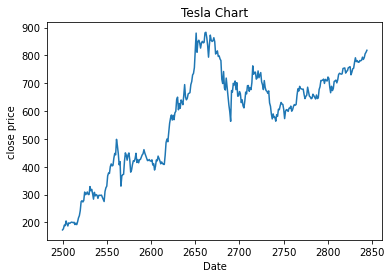

In [35]:
plt.figure()
plt.plot(df['Close'])
plt.title('Tesla Chart')
plt.xlabel('Date')
plt.ylabel('close price')

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)
# Taken from the Slack Channel

X = pd.DataFrame(df["Date"]) 
y = pd.DataFrame(df["Close"]) 

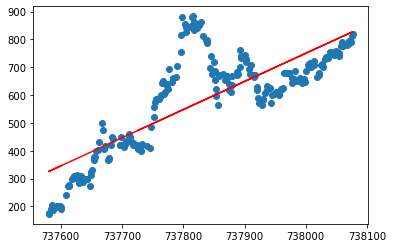

MSE = 12209.241754847786


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions
plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

#This code is taken from Lab 4

In [38]:
# A function to predict the price at a specific date
def predictPrice(date):
    prediction = linear_regressor.predict([[pd.to_datetime(date).toordinal()]])
    return prediction

In [12]:
#Type in the date which you want to predict the price of.
p = predictPrice("2021-10-25")
print(p)

[[838.99620854]]
